# Airline Passenger Satisfaction Analysis

## I. Overview
This project uses various classification modeling to predict the airline passenger satisfaction after the flight journey.

## II. Business Problem
- How to improve airline customer experience?
***
### Question to Consider:
- blahblahblah

## III. Data Understanding

In [1]:
import pandas as pd
pd.options.display.max_columns = 25
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('data/train.csv', index_col=0) # Treat the "Unnamed: 0" as the index column
display(df_train.shape)
display(df_train.head())
display(df_train.info())

(103904, 24)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
id                                   103904 non-null int64
Gender                               103904 non-null object
Customer Type                        103904 non-null object
Age                                  103904 non-null int64
Type of Travel                       103904 non-null object
Class                                103904 non-null object
Flight Distance                      103904 non-null int64
Inflight wifi service                103904 non-null int64
Departure/Arrival time convenient    103904 non-null int64
Ease of Online booking               103904 non-null int64
Gate location                        103904 non-null int64
Food and drink                       103904 non-null int64
Online boarding                      103904 non-null int64
Seat comfort                         103904 non-null int64
Inflight entertainment               103904 non-null int64


None

In [3]:
df_test = pd.read_csv('data/test.csv', index_col=0) # Treat the "Unnamed: 0" as the index column
display(df_test.shape)
display(df_test.head())
display(df_test.info())

(25976, 24)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


<class 'pandas.core.frame.DataFrame'>
Int64Index: 25976 entries, 0 to 25975
Data columns (total 24 columns):
id                                   25976 non-null int64
Gender                               25976 non-null object
Customer Type                        25976 non-null object
Age                                  25976 non-null int64
Type of Travel                       25976 non-null object
Class                                25976 non-null object
Flight Distance                      25976 non-null int64
Inflight wifi service                25976 non-null int64
Departure/Arrival time convenient    25976 non-null int64
Ease of Online booking               25976 non-null int64
Gate location                        25976 non-null int64
Food and drink                       25976 non-null int64
Online boarding                      25976 non-null int64
Seat comfort                         25976 non-null int64
Inflight entertainment               25976 non-null int64
On-board service 

None

In [4]:
total_rows = df_train.shape[0] + df_test.shape[0]
test_df_size = df_test.shape[0] / total_rows
print(test_df_size)

0.2


### Note:
- Data source https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction
- The datasets acquired from kaggel contain train and test sets which have been already split into 80/20. For analysis (ML) purpose, I will combine those two datasets.
- (Some pattern can be only seen at specific part of the dataset)

### Combine data

In [5]:
df = pd.concat([df_train, df_test]).reset_index(drop=True)
display(df.shape)
display(df.head())
display(df.info())

(129880, 24)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
id                                   129880 non-null int64
Gender                               129880 non-null object
Customer Type                        129880 non-null object
Age                                  129880 non-null int64
Type of Travel                       129880 non-null object
Class                                129880 non-null object
Flight Distance                      129880 non-null int64
Inflight wifi service                129880 non-null int64
Departure/Arrival time convenient    129880 non-null int64
Ease of Online booking               129880 non-null int64
Gate location                        129880 non-null int64
Food and drink                       129880 non-null int64
Online boarding                      129880 non-null int64
Seat comfort                         129880 non-null int64
Inflight entertainment               129880 non-null int64


None

### Description for each columns' abbreviation
- <b>Gender</b> - Gender of the passengers (Female, Male)
- <b>Customer Type</b> - The customer type (Loyal customer, disloyal customer)
- <b>Age</b> - The actual age of the passengers
- <b>Type of Travel</b>: Purpose of the flight of the passengers (Personal Travel, Business Travel)
- <b>Class</b> - Travel class in the plane of the passengers (Business, Eco, Eco Plus)
- <b>Flight distance</b> - The flight distance of this journey
- <b>Inflight wifi service</b> - Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
- <b>Departure/Arrival time convenient</b> - Satisfaction level of Departure/Arrival time convenient
- <b>Ease of Online booking</b> - Satisfaction level of online booking
- <b>Gate location</b> - Satisfaction level of Gate location
- <b>Food and drink</b> - Satisfaction level of Food and drink
- <b>Online boarding</b> - Satisfaction level of online boarding
- <b>Seat comfort</b> - Satisfaction level of Seat comfort
- <b>Inflight entertainment</b> - Satisfaction level of inflight entertainment
- <b>On-board service</b> - Satisfaction level of On-board service
- <b>Leg room service</b> - Satisfaction level of Leg room service
- <b>Baggage handling</b> - Satisfaction level of baggage handling
- <b>Check-in service</b> - Satisfaction level of Check-in service
- <b>Inflight service</b> - Satisfaction level of inflight service
- <b>Cleanliness</b> - Satisfaction level of Cleanliness
- <b>Departure Delay in Minutes</b> - Minutes delayed when departure
- <b>Arrival Delay in Minutes</b> - Minutes delayed when Arrival
- <b>Satisfaction</b> - Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

### Check for the null values

In [6]:
df.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

>**Comment:** 
- No need to worried about duplicates (same customers can take multiple journey at different time)

- <b>a) Categorical Columns: </b>
    - `Gender`, `Customer Type`, `Type of Travel`, and `Class` are either binary or ternary columns

- <b>b) Numeric Columns: </b>
    - `Age`, `Flight Distance`, `Departure Dalay in Minutes`, and `Arrival Delay in Minutes` are numeric columns

- <b>c) Survey Columns: </b>
    - From `Inflight wifi service` ... to ... `Cleanliness` are columns contains values from 0 to 5 (0:not applicable; 1 to 5 scale)

    - Only `Arrival Delay in Minutes` contains null value 

### Target Variable - `satisfaction`
- Check imbalance

In [7]:
df['satisfaction'].value_counts(normalize=True)

neutral or dissatisfied    0.565537
satisfied                  0.434463
Name: satisfaction, dtype: float64

- Binary classifiers 
- Around 57% to 43%. The data is quite balance
- Change to binary indicator

#### Note: some explanation in further content
- When I use the phrase "dissatisfied" it doesn't necessary mean only dissatisfied customers. Instead, it represents both neutral and dissatisfied customers.

### Predictor

#### a) Categorical Columns

In [8]:
# cat_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
# for col in cat_cols:
#     display(pd.DataFrame(df[col].value_counts(normalize=True)))
#     display(pd.DataFrame(df.groupby([col, 'satisfaction'])['satisfaction'].count()))

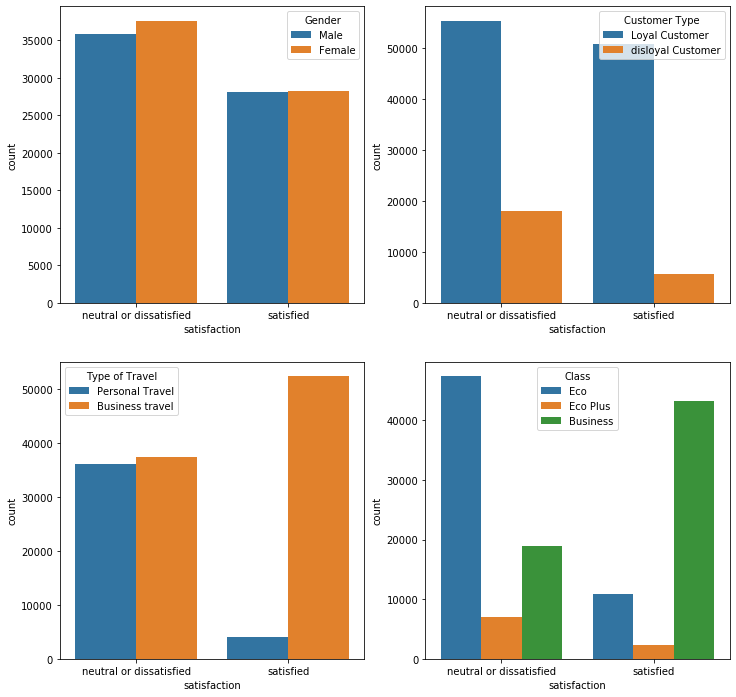

In [9]:
fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(12,12))

# Gender
sns.countplot(data=df, x='satisfaction', hue='Gender', ax=axes[0,0])

# Customer Type
sns.countplot(data=df, x='satisfaction', hue='Customer Type', ax=axes[0,1])

# Type of Travel
sns.countplot(data=df, x='satisfaction', hue='Type of Travel', ax=axes[1,0])

# Class
sns.countplot(data=df, x='satisfaction', hue='Class', hue_order=['Eco', 'Eco Plus', 'Business'], ax=axes[1,1])

plt.show()

>**Comment:**
- `Gender`: Gender distribution of satisfied and dissatisfied are quite same. No obvious relationship. Drop this column later

- `Customer Type`: More Loyal customer (take repeat flights) than Disloyal customers(take once only). More dissatisfied customers for both group

- `Type of Travel`: Similar dissatisfied for both Persoanl and Business travel customers. More satisfied customers in Business travel

- `Class`: Eco Plus only counts for small percent compare with Eco and Business Class. More dissatisfied customers in both Eco and Eco Plus. More satisfied customers in Businees Class

#### b) Numeric Columns

In [10]:
num_cols = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
df[num_cols].describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1190.316392,14.713713,15.091129
std,15.119360,997.452477,38.071126,38.465650
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,844.000000,0.000000,0.000000
75%,51.000000,1744.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


- `Departure Delay in Minutes` and `Arrival Delay in Minutes` can be changed into binary columns

In [11]:
# sns.distplot(df['Age'])
# plt.show()

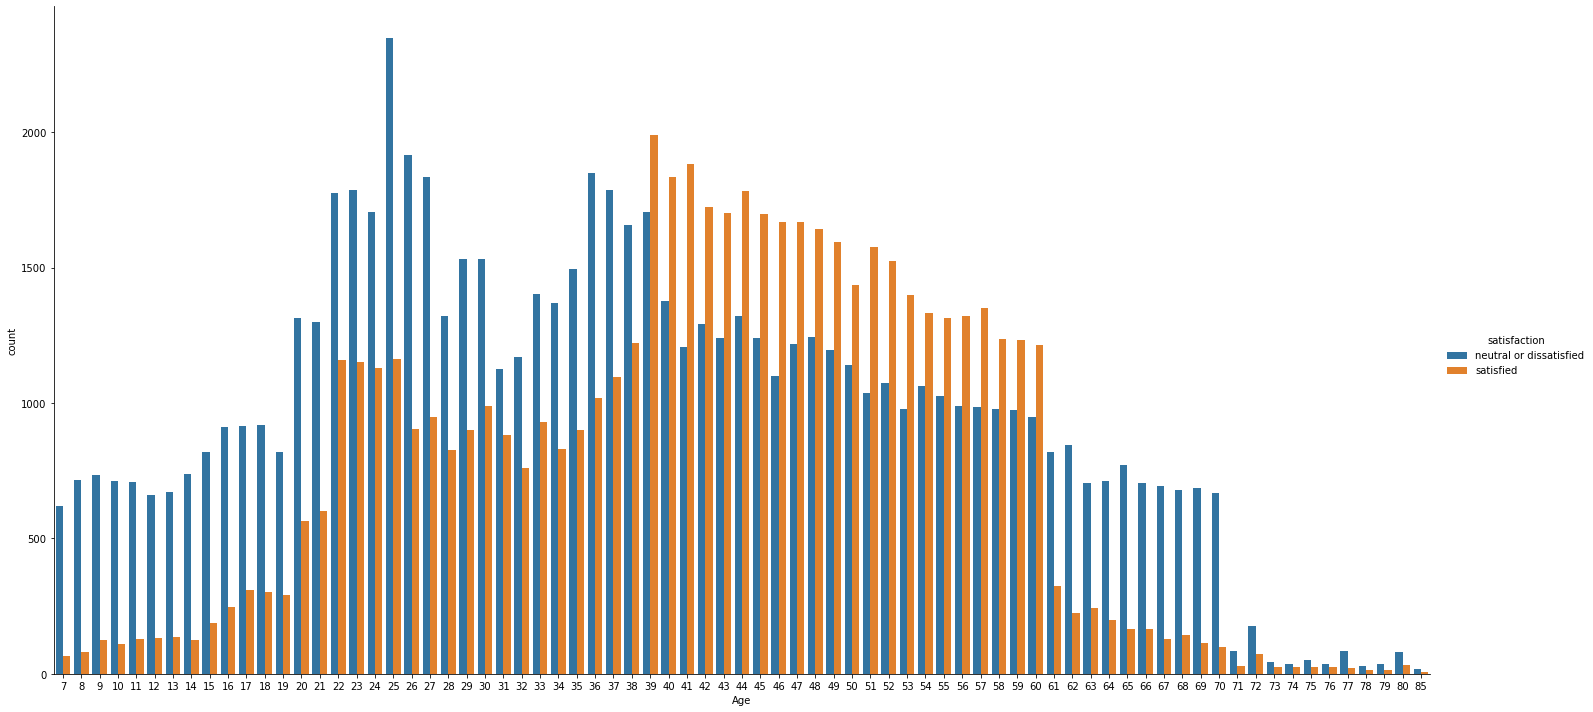

In [12]:
# fig,ax = plt.subplots(figsize=(15,15)) does not work???!
ax = sns.catplot(data=df, x='Age', kind='count', hue='satisfaction', size=10, aspect=2);

- More satisfied than dissatisfied customers between 40 and 60
- Less customers above 70
- Separate into different age groups for better analysis?
    - improve flight service can be treat differently based on different age group


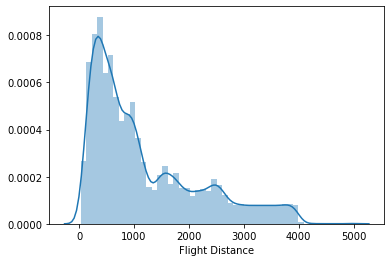

In [13]:
sns.distplot(df['Flight Distance'])
plt.show()

- flight distance -https://en.wikipedia.org/wiki/Flight_length#:~:text=Route%20category%20lengths%20tend%20to,haul%20as%20being%20in%2Dbetween.

- may be change flight distance to short, medium and long haul?
    - less than 1500 km
    - between 1500 and 4800
    - greater than 4800 km
    - improve flight service can be treat differently based on different flight haul

In [14]:
# df.loc[(df['Departure Delay in Minutes'] <= 10) | (df['Arrival Delay in Minutes'] <= 10)]

In [15]:
# df.loc[df['Arrival Delay in Minutes'].isna()].head(10)

In [16]:
print("Null value percentage:", round(df['Arrival Delay in Minutes'].isna().mean()*100, 3), "%")

Null value percentage: 0.303 %


- null value only account for a small percent => drop the null value
- Departure late doesn't mean it will cause necessarily arrival late
- How late is late? 
- departure / arrival delay less than 10 minues => not significant delay (with tolerance)

#### c) Survey Columns

In [17]:
for ind, col in enumerate(df.columns):
    print(ind, col)

0 id
1 Gender
2 Customer Type
3 Age
4 Type of Travel
5 Class
6 Flight Distance
7 Inflight wifi service
8 Departure/Arrival time convenient
9 Ease of Online booking
10 Gate location
11 Food and drink
12 Online boarding
13 Seat comfort
14 Inflight entertainment
15 On-board service
16 Leg room service
17 Baggage handling
18 Checkin service
19 Inflight service
20 Cleanliness
21 Departure Delay in Minutes
22 Arrival Delay in Minutes
23 satisfaction


In [18]:
# df.columns[7:21]

In [19]:
survey_cols = df.columns[7:21]
df[survey_cols].describe()

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326
std,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


- If treat those columns as numeric columns, don't need to scale (alrealy on the same 1 to 5 scale)

In [20]:
# Want to check the 0 rating...

for cols in df.columns[7:21]:
    display(pd.DataFrame(df[cols].value_counts(normalize=True)))

,Inflight wifi service
2,0.248845
3,0.247806
4,0.190753
1,0.171913
5,0.110533
0,0.030151


,Departure/Arrival time convenient
4,0.245457
5,0.215568
3,0.172298
2,0.165799
1,0.149438
0,0.051440


,Ease of Online booking
3,0.234008
2,0.231375
4,0.188204
1,0.168509
5,0.134155
0,0.043748


,Gate location
3,0.275000
4,0.234570
2,0.187065
1,0.169318
5,0.134039
0,0.000008


,Food and drink
4,0.235317
5,0.215253
3,0.213998
2,0.210833
1,0.123583
0,0.001016


,Online boarding
4,0.296181
3,0.208785
5,0.200339
2,0.168879
1,0.102102
0,0.023714


,Seat comfort
4,0.306098
5,0.255297
3,0.179612
2,0.142662
1,0.116323
0,0.000008


,Inflight entertainment
4,0.283269
5,0.242870
3,0.183893
2,0.169141
1,0.120688
0,0.000139


,On-board service
4,0.297990
5,0.227071
3,0.219757
2,0.141292
1,0.113851
0,0.000038


,Leg room service
4,0.276301
5,0.237950
3,0.192917
2,0.188944
1,0.099284
0,0.004604


,Baggage handling
4,0.360032
5,0.260841
3,0.199038
2,0.110579
1,0.069510


,Checkin service
4,0.279743
3,0.272967
5,0.199284
1,0.124022
2,0.123976
0,0.000008


,Inflight service
4,0.364359
5,0.262288
3,0.194918
2,0.110163
1,0.068232
0,0.000038


,Cleanliness
4,0.261541
3,0.235902
5,0.218787
2,0.154858
1,0.128804
0,0.000108


- 0: Not applicable accounts only a small percent for all the survey columns => treat as 1 for better analysis

....Want some nice looking subplots below

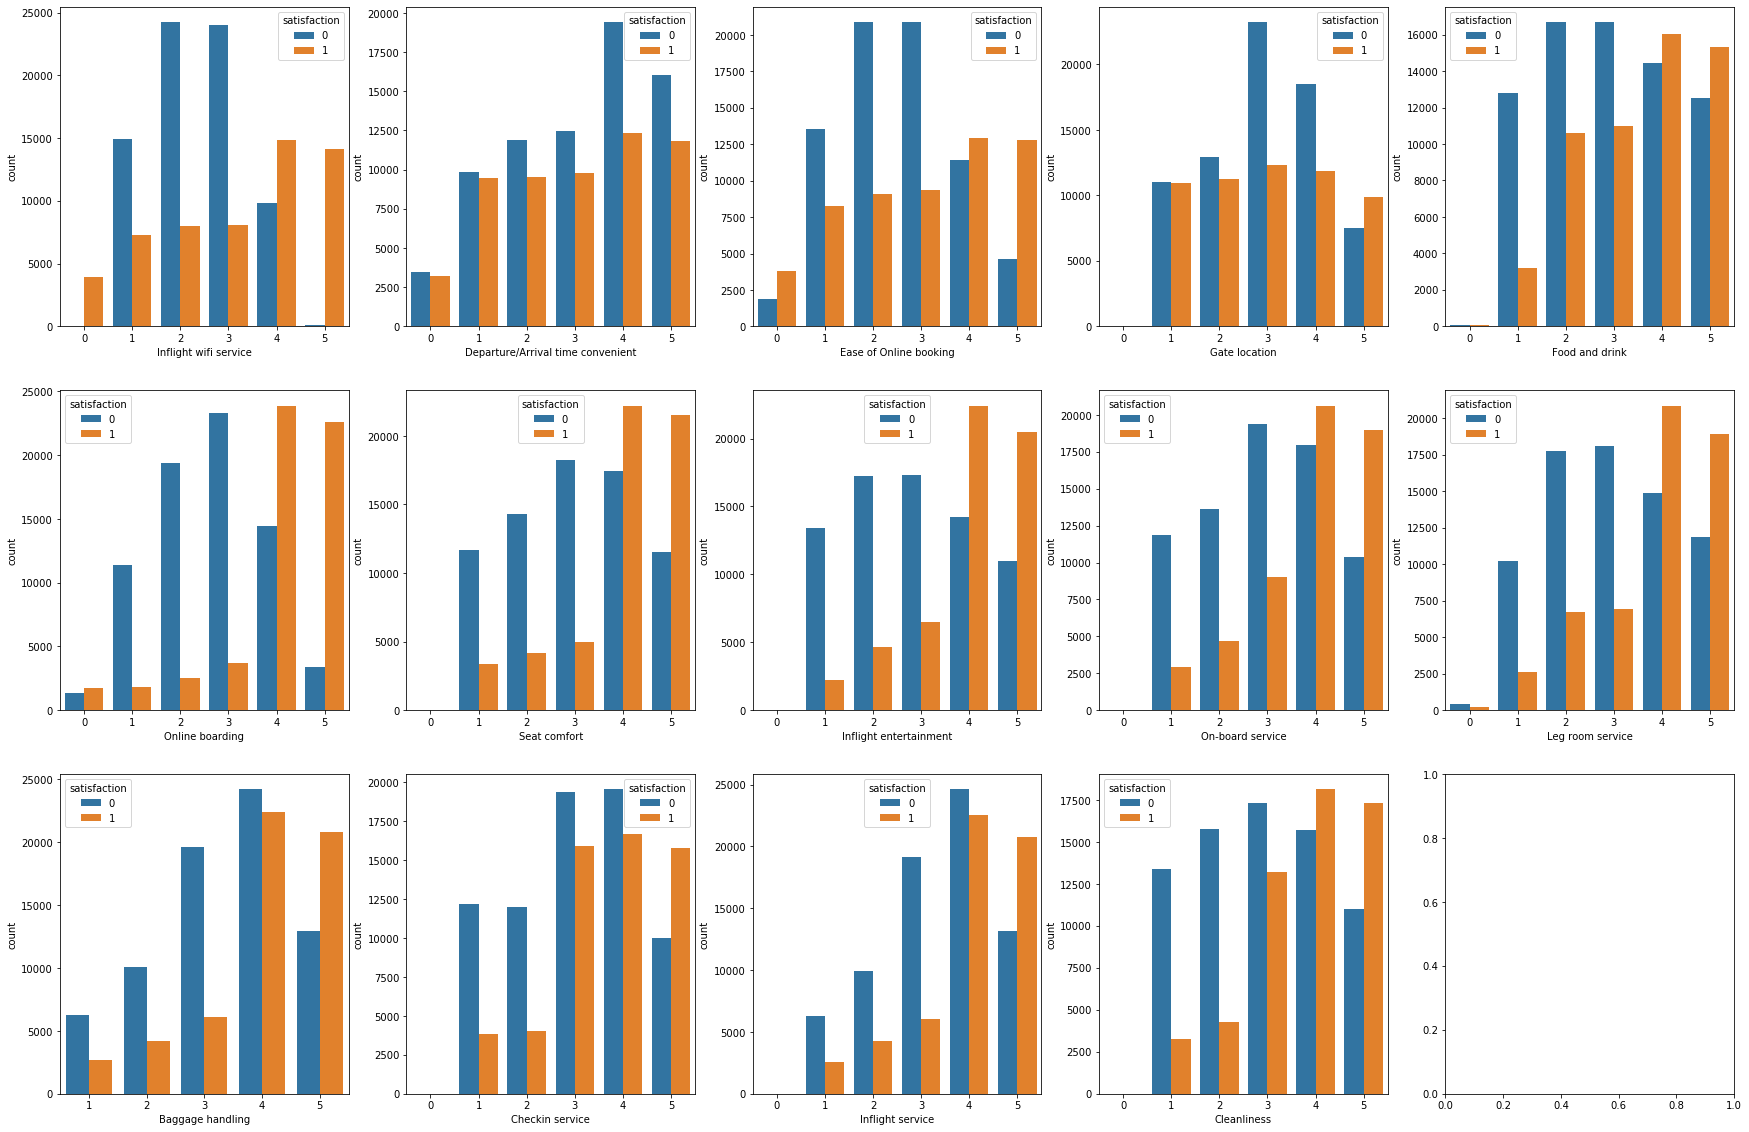

In [91]:
fig, ax = plt.subplots(3, 5, figsize=(30, 20))
for variable, subplot in zip(survey_cols, ax.flatten()):
    sns.countplot(data[variable],hue=data['satisfaction'], ax=subplot)

In [87]:
# for s_col in survey_cols:
#     display(pd.DataFrame(df.groupby([s_col, 'satisfaction'])['satisfaction'].count()))

### *Columns need to be cleaned*

#### Target Column
- Change to binary indicator

#### a) Categorical Columns
- Drop the `id` and `Gender` column

#### b) Numeric Columns
- `Age` split into different age group
- `Flight Distance` change to a ternary columns
- `Arrival Delay` drop the null values
- Combine `Departure Delay` and `Arrival Delay`. Change to a binary column. Add up, less than 20 minutes => consider as not delayed, otherwise delay. 

#### c) Survey Columns
- Change the rating 0 to 1

## IV. Data Preparation

In [24]:
data = df.copy()

### Target Column Cleaning
- `satisfaction` changed to 0 or 1

In [25]:
data['satisfaction'] = data['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})

In [26]:
# data.head()

### a) Categorical Columns Cleaning
- Drop the `id` and `Gender` columns

In [27]:
data.drop(columns=['id', 'Gender'], inplace=True)

In [28]:
# data.columns

### b) Numerical Columns Cleaning

#### `Age`
- Divide into groups https://integrisok.com/resources/on-your-health/2015/october/stages-of-life-health-for-every-age
- Young: <20
- Adult: 20~40
- Middle: 40~60
- Senior: >60

In [29]:
stage = []

for age in data['Age']:
    # Young
    if age < 20:
        stage.append("Young")
        
    elif age >= 20 and age < 40:
        stage.append("Adult")
    
    elif age >=40 and age < 60:
        stage.append("Middle")
        
    else:
        stage.append("Senior")

data['Age'] = stage

In [30]:
data.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Loyal Customer,Young,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,disloyal Customer,Adult,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,Loyal Customer,Adult,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,Loyal Customer,Adult,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,Loyal Customer,Senior,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


#### `Flight Distance`
- (Assume the distance is in mile unit) convert mile to km
- Change the column to a ternary column

In [31]:
# 1 mile = 1.609 km
data['Flight Distance'] = data['Flight Distance']*1.609

In [32]:
haul = []

for distance in data['Flight Distance']:
    # short haul less than 1500 km
    if distance <= 1500:
        haul.append("short")
    
    # long haul greater than 4100 km
    elif distance >= 4100:
        haul.append("long")
    
    # medium haul between 1500 and 4100 km    
    else:
        haul.append("medium")

data['Flight Distance'] = haul

In [33]:
data.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Loyal Customer,Young,Personal Travel,Eco Plus,short,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,disloyal Customer,Adult,Business travel,Business,short,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,Loyal Customer,Adult,Business travel,Business,medium,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,Loyal Customer,Adult,Business travel,Business,short,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,Loyal Customer,Senior,Business travel,Business,short,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


#### `Arrival Delay in Minutes`
- Drop the null values

In [34]:
df.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [35]:
129880-393

129487

In [36]:
data = data.dropna(axis=0)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 22 columns):
Customer Type                        129487 non-null object
Age                                  129487 non-null object
Type of Travel                       129487 non-null object
Class                                129487 non-null object
Flight Distance                      129487 non-null object
Inflight wifi service                129487 non-null int64
Departure/Arrival time convenient    129487 non-null int64
Ease of Online booking               129487 non-null int64
Gate location                        129487 non-null int64
Food and drink                       129487 non-null int64
Online boarding                      129487 non-null int64
Seat comfort                         129487 non-null int64
Inflight entertainment               129487 non-null int64
On-board service                     129487 non-null int64
Leg room service                     129487 non-null int64

#### `Delay`
- Combine the `Departure Delay in Minutes` and `Arrival Delay in Minutes` into a new column: `Status`
- If the total delay is less or equal to 20 minutes, then consider on time. Otherwise, delay.

In [38]:
data['Status'] = data['Departure Delay in Minutes'] + data['Arrival Delay in Minutes']
data.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Status
0,Loyal Customer,Young,Personal Travel,Eco Plus,short,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0,43.0
1,disloyal Customer,Adult,Business travel,Business,short,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0,7.0
2,Loyal Customer,Adult,Business travel,Business,medium,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1,0.0
3,Loyal Customer,Adult,Business travel,Business,short,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0,20.0
4,Loyal Customer,Senior,Business travel,Business,short,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1,0.0


In [39]:
status = []

for time in data['Status']:
    if time <= 20:
        status.append("On time")
    else:
        status.append("Delay")

data['Status'] = status

In [40]:
data.drop(columns=['Departure Delay in Minutes', 'Arrival Delay in Minutes'], inplace=True)

In [41]:
data.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,Status
0,Loyal Customer,Young,Personal Travel,Eco Plus,short,3,4,3,1,5,3,5,5,4,3,4,4,5,5,0,Delay
1,disloyal Customer,Adult,Business travel,Business,short,3,2,3,3,1,3,1,1,1,5,3,1,4,1,0,On time
2,Loyal Customer,Adult,Business travel,Business,medium,2,2,2,2,5,5,5,5,4,3,4,4,4,5,1,On time
3,Loyal Customer,Adult,Business travel,Business,short,2,5,5,5,2,2,2,2,2,5,3,1,4,2,0,On time
4,Loyal Customer,Senior,Business travel,Business,short,3,3,3,3,4,5,5,3,3,4,4,3,3,3,1,On time


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 21 columns):
Customer Type                        129487 non-null object
Age                                  129487 non-null object
Type of Travel                       129487 non-null object
Class                                129487 non-null object
Flight Distance                      129487 non-null object
Inflight wifi service                129487 non-null int64
Departure/Arrival time convenient    129487 non-null int64
Ease of Online booking               129487 non-null int64
Gate location                        129487 non-null int64
Food and drink                       129487 non-null int64
Online boarding                      129487 non-null int64
Seat comfort                         129487 non-null int64
Inflight entertainment               129487 non-null int64
On-board service                     129487 non-null int64
Leg room service                     129487 non-null int64

## V. Modeling

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, plot_confusion_matrix, plot_roc_curve

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

### Baseline Model

In [45]:
X = data.drop(columns=['satisfaction'], axis=1)
y = data['satisfaction']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=24)

In [46]:
cat_cols = []
num_cols = []

for col in X.columns:
    if X[col].dtype == "object":
        cat_cols.append(col)
    else:
        num_cols.append(col)

In [47]:
print(f"Categorical columns:{cat_cols}")

print("\n")

print(f"Numerical columns:{num_cols}")

Categorical columns:['Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Status']


Numerical columns:['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']


In [61]:
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

ohe_transformer = Pipeline(steps=[
    ('ohe', OneHotEncoder())])

In [62]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_cols),
    ('cat_ohe', ohe_transformer, cat_cols)])

In [72]:
clf_lg = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', LogisticRegression(random_state=24))])

clf_lg.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate location',
                                                   'Food and drink',
                                                   'Online boarding',
                                                   'Seat comfort',
                                                   'Inflight entertainment',
                                                   'On-board service',
                              

In [73]:
def evaluate (model, X_train, X_test, y_train, y_test, use_decision_function='yes'):
    
    y_train_preds = model.predict(X_train)
    y_test_preds = model.predict(X_test)
    
    
    if use_decision_function == 'skip': # skips calculating the roc_auc_score
        train_score = False
        test_score = False
    
    elif use_decision_function == 'yes': # not all classifiers have decision_function
        train_score = model.decision_function(X_train)
        test_score = model.decision_function(X_test)
    
    elif use_decision_function == 'no':
        train_score = model.predict_proba(X_train)[:, 1] # proba for the 1 class
        test_score = model.predict_proba(X_test)[:, 1]
    
    else:
        raise Exception ("The value for use_decision_function should be 'skip', 'yes' or 'no'.")

#     print(type(test_out))
    
    
    print("Training Scores")
    print("-*-*-*-*-*-*-*-*")
    print(f"Accuracy: {accuracy_score(y_train, y_train_preds)}")
    print(f"F1 Score: {f1_score(y_train, y_train_preds)}")
    if type(train_score) == np.ndarray:
        print(f"ROC-AUC: {roc_auc_score(y_train, train_score)}")
    
    print('\n')
    
    print("Testing Scores")
    print("-*-*-*-*-*-*-*-*")
    print(f"Accuracy: {accuracy_score(y_test, y_test_preds)}")
    print(f"F1 Score: {f1_score(y_test, y_test_preds)}")
    if type(test_score) == np.ndarray:
        print(f"ROC-AUC: {roc_auc_score(y_test, test_score)}")
    

    plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
    
    plot_roc_curve(model, X_test, y_test)
    
    plt.show()

Training Scores
-*-*-*-*-*-*-*-*
Accuracy: 0.8741183133398548
F1 Score: 0.8526060693746156
ROC-AUC: 0.9279383402797724


Testing Scores
-*-*-*-*-*-*-*-*
Accuracy: 0.8745211911528481
F1 Score: 0.8523123909249565
ROC-AUC: 0.9265509375519111


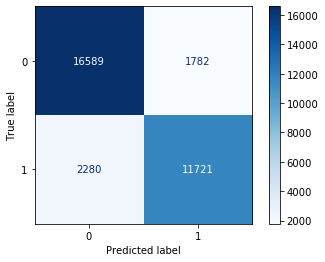

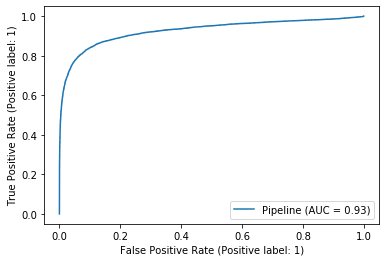

In [74]:
evaluate(clf_lg, X_train, X_test, y_train, y_test)

### Decision Trees

In [75]:
clf_dt = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', DecisionTreeClassifier(criterion='entropy', random_state=24))])

clf_dt.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate location',
                                                   'Food and drink',
                                                   'Online boarding',
                                                   'Seat comfort',
                                                   'Inflight entertainment',
                                                   'On-board service',
                              

Training Scores
-*-*-*-*-*-*-*-*
Accuracy: 0.9997219790969469
F1 Score: 0.9996804620282377
ROC-AUC: 0.9999998425492285


Testing Scores
-*-*-*-*-*-*-*-*
Accuracy: 0.9463734091189917
F1 Score: 0.9381898454746136
ROC-AUC: 0.945797879216315


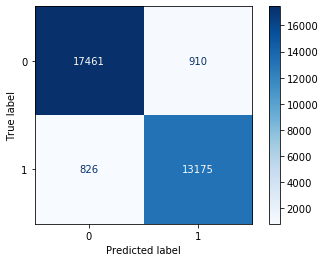

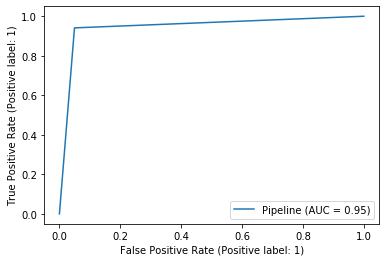

In [76]:
evaluate(clf_dt, X_train, X_test, y_train, y_test, use_decision_function='no')

### Random Forests

In [77]:
clf_rf = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', RandomForestClassifier(random_state=24))])

clf_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate location',
                                                   'Food and drink',
                                                   'Online boarding',
                                                   'Seat comfort',
                                                   'Inflight entertainment',
                                                   'On-board service',
                              

Training Scores
-*-*-*-*-*-*-*-*
Accuracy: 0.9997219790969469
F1 Score: 0.9996805225231621
ROC-AUC: 0.9999995884711343


Testing Scores
-*-*-*-*-*-*-*-*
Accuracy: 0.9620659829482269
F1 Score: 0.9554394368241527
ROC-AUC: 0.9931692690628787


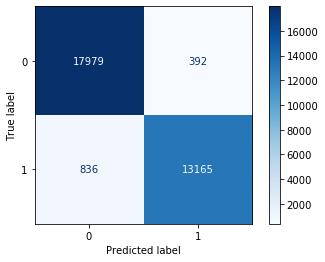

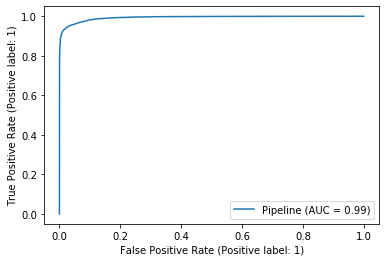

In [78]:
evaluate(clf_rf, X_train, X_test, y_train, y_test, use_decision_function='no')

### XGB Boost

In [79]:
clf_xgb = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', XGBClassifier(random_state=24))])

clf_xgb.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate location',
                                                   'Food and drink',
                                                   'Online boarding',
                                                   'Seat comfort',
                                                   'Inflight entertainment',
                                                   'On-board service',
                              

Training Scores
-*-*-*-*-*-*-*-*
Accuracy: 0.9399886732224683
F1 Score: 0.929993993993994
ROC-AUC: 0.9876373353246429


Testing Scores
-*-*-*-*-*-*-*-*
Accuracy: 0.9424811565550476
F1 Score: 0.9325704352864489
ROC-AUC: 0.9875821602686444


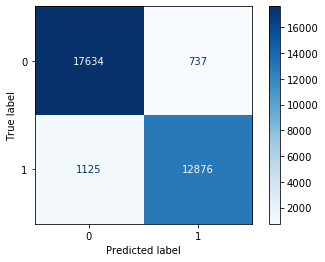

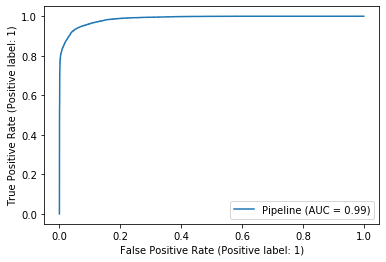

In [80]:
evaluate(clf_xgb, X_train, X_test, y_train, y_test, use_decision_function='no')

## May be split into subdataset ....

In [81]:
data.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,Status
0,Loyal Customer,Young,Personal Travel,Eco Plus,short,3,4,3,1,5,3,5,5,4,3,4,4,5,5,0,Delay
1,disloyal Customer,Adult,Business travel,Business,short,3,2,3,3,1,3,1,1,1,5,3,1,4,1,0,On time
2,Loyal Customer,Adult,Business travel,Business,medium,2,2,2,2,5,5,5,5,4,3,4,4,4,5,1,On time
3,Loyal Customer,Adult,Business travel,Business,short,2,5,5,5,2,2,2,2,2,5,3,1,4,2,0,On time
4,Loyal Customer,Senior,Business travel,Business,short,3,3,3,3,4,5,5,3,3,4,4,3,3,3,1,On time


In [94]:
data['Flight Distance'].value_counts()

short     70481
medium    42438
long      16568
Name: Flight Distance, dtype: int64

In [85]:
data['Class'].value_counts()

Business    61990
Eco         58117
Eco Plus     9380
Name: Class, dtype: int64

In [95]:
short_haul = data.loc[data['Flight Distance'] == "short"]
medium_haul = data.loc[data['Flight Distance'] == "medium"]
long_haul = data.loc[data['Flight Distance'] == "long"]

In [97]:
X_short = data.drop('satisfaction', axis=1)
y_short = data['satisfaction']

X_short_train, X_short_test, y_short_train, y_short_test = train_test_split(X_short, y_short, random_state=24)

In [124]:
clf_dt_short = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', DecisionTreeClassifier(criterion='entropy', random_state=24))])

clf_dt_short.fit(X_short_train, y_short_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate location',
                                                   'Food and drink',
                                                   'Online boarding',
                                                   'Seat comfort',
                                                   'Inflight entertainment',
                                                   'On-board service',
                              

Training Scores
-*-*-*-*-*-*-*-*
Accuracy: 0.9997219790969469
F1 Score: 0.9996804620282377
ROC-AUC: 0.9999998425492285


Testing Scores
-*-*-*-*-*-*-*-*
Accuracy: 0.9463734091189917
F1 Score: 0.9381898454746136
ROC-AUC: 0.945797879216315


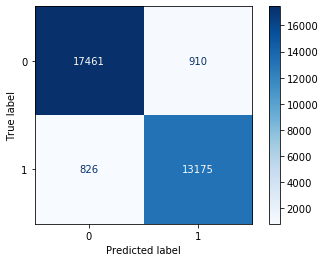

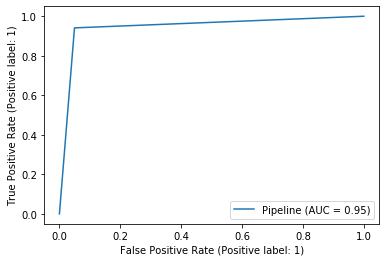

In [126]:
evaluate(clf_dt_short, X_short_train, X_short_test, y_short_train, y_short_test, use_decision_function='no')

In [130]:
# clf_dt_short.feature_importance_

# can not run because Pipeline has no attribute for feature_importance

In [137]:
coef = clf_dt_short.steps[1][1].feature_importances_
coef

array([0.18928487, 0.00939046, 0.0049662 , 0.02341961, 0.00873733,
       0.3028464 , 0.02234046, 0.02950051, 0.04129684, 0.01840224,
       0.02555741, 0.03292226, 0.0244544 , 0.02311035, 0.03244769,
       0.01603932, 0.0038226 , 0.00285807, 0.00196413, 0.00179895,
       0.11692786, 0.01515116, 0.03648496, 0.00214603, 0.00125254,
       0.00088667, 0.00363697, 0.00266388, 0.00246495, 0.00322487])

In [134]:
col_name = data.columns.to_list()

In [141]:
coef_imp = dict(zip(col_name, coef))
coef_df = pd.DataFrame(list(coef_imp.items()), columns=['variable', 'coefficient'])
coef_df.sort_values(by='coefficient', ascending=False)

,variable,coefficient
5,Inflight wifi service,0.302846
0,Customer Type,0.189285
20,Status,0.116928
8,Gate location,0.041297
11,Seat comfort,0.032922
14,Leg room service,0.032448
7,Ease of Online booking,0.029501
10,Online boarding,0.025557
12,Inflight entertainment,0.024454
3,Class,0.023420


## VI. Evaluation

## VII. Conclusion